<a href="https://colab.research.google.com/github/UW-CTRL/AA548-spr2024/blob/main/homework/hw3_problem2_helper_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def plot_95_ellipse(mean, covariance, color="black"):
    chi_95 = 5.991
    mean = np.array([[mean[0]],[mean[1]]])
    val, rot = np.linalg.eig(covariance)
    val = np.sqrt(val * chi_95)
    t = np.linspace(0, 2.0 * np.pi, 1000)
    xy = np.stack((np.cos(t), np.sin(t)), axis=-1)

    plt.plot(*(rot @ (val * xy).T + mean), c=color)
    plt.fill(*(rot @ (val * xy).T + mean), alpha=0.3, c=color)

Below, is an example of how to plot ellipses, and also how to plot ellipses emanating from a (velocity) vector starting from points along a trajectory.

In [3]:
N = 20
x = np.arange(20) * 3
# generate mean velocities and covariances
mean_velocity = np.stack([5*np.cos(0.2 * x), 5*np.sin(0.2 * x)], 1)
covariance_velocity = []
for i in range(N):
    p = np.random.rand(2,2) * 0.5
    covariance_velocity += [p + p.T + np.diag([.5, .5])]

# generate position trajectory
positions = np.stack([x,  x**1.2], 1)

/tmp/ipykernel_53475/1431488857.py:5: RuntimeWarning: invalid value encountered in sqrt
  val = np.sqrt(val * chi_95)


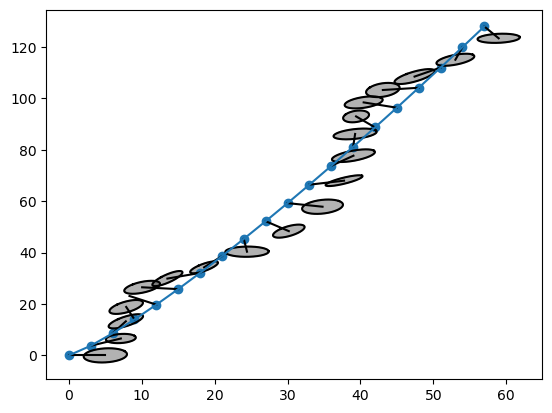

In [4]:

for (i,(u,v,p)) in enumerate(zip(mean_velocity, covariance_velocity, positions)):
    # plot mean and error ellipses of the velocity along the trajectory of the drone
    # (plotting them as vectors emanating from the quadrotor’s position)
    # with the ellipse centered at the tip of the vector).
    plot_95_ellipse(p+u, v)
    plt.plot([p[0],p[0]+u[0]], [p[1],p[1]+u[1]], c="black")

plt.plot(positions[:,0], positions[:,1])
plt.scatter(positions[:,0], positions[:,1])


In [7]:
dt = 1

A = np.array([[1, 0, dt, 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0, 1]])
B = np.array([[0, 0], [0, 0], [dt, 0], [0, dt]])
C = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])

initial_state = np.array([1000, 0, 0, 50])

states = [initial_state]
controls = []
output = []
t = 0
t0 = t 

for i in range(60): 
    controls.append( -2.5 * np.array([np.cos(0.05*t), np.sin(0.05*t)]))
    states.append(A @ states[i] + B @ controls[i] )
    output.append(C @ states[i])
    t += dt

controls = np.stack(controls)
states = np.stack(states)
output = np.stack(output)



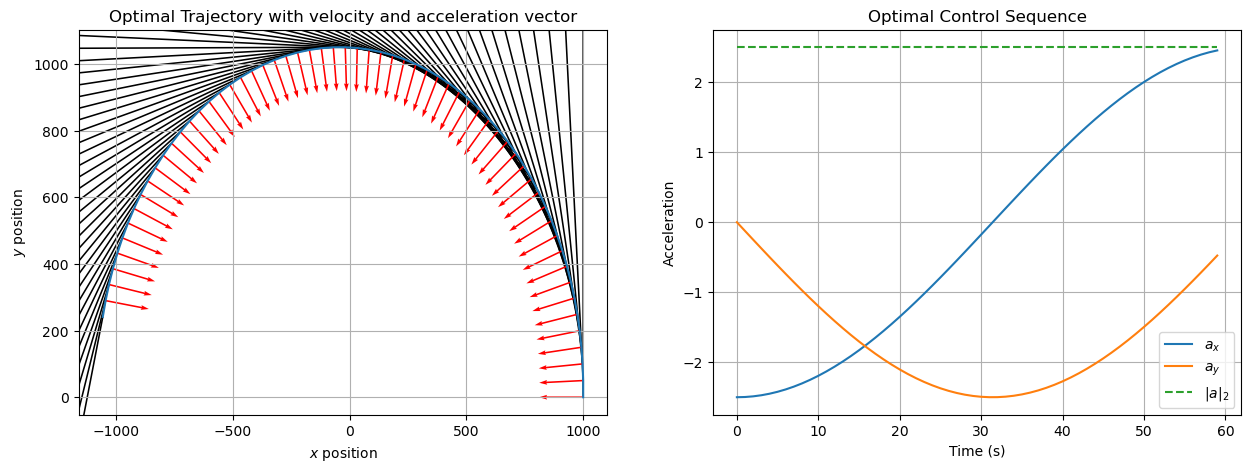

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(states[:,0], states[:,1])
plt.quiver(states[:,0], states[:,1], states[:,2], states[:,3], scale=30, width=.003)  # show velocity vector
plt.quiver(states[:-1,0], states[:-1,1], controls[:,0], controls[:,1], scale=30, width=.003, color='red')  # show acceleration vector
plt.title("Optimal Trajectory with velocity and acceleration vector")
plt.xlabel("$x$ position")
plt.ylabel("$y$ position")
plt.grid()

plt.subplot(1,2,2)
plt.plot(controls)
plt.plot(np.linalg.norm(controls, 2, axis=1), '--')
plt.title("Optimal Control Sequence")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration")
plt.legend(["$a_x$", "$a_y$", "$\|a\|_2$"])
plt.grid()

In [73]:
dt = 1

A = np.array([[1, 0, dt, 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0, 1]])
B = np.array([[0, 0], [0, 0], [dt, 0], [0, dt]])
C = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])

Q = np.diag([1,1])
R = 9*np.diag([1,1])
mean = np.array([0,0])


initial_state = np.array([1000, 0, 0, 50])

states = [initial_state]
controls = []
output = []
t = 0
t0 = t 

for i in range(60):
    wx, wy = np.random.multivariate_normal(mean, Q,)
    vx, vy = np.random.multivariate_normal(mean, R,) 
    controls.append( -2.5 * np.array([np.cos(0.05*t), np.sin(0.05*t)]))
    states.append(A @ states[i] + B @ controls[i] + [0, 0, wx, wy] )
    output.append(C @ states[i] + [vx, vy, 0, 0] )
    t += dt

controls = np.stack(controls)
states = np.stack(states)
output = np.stack(output)



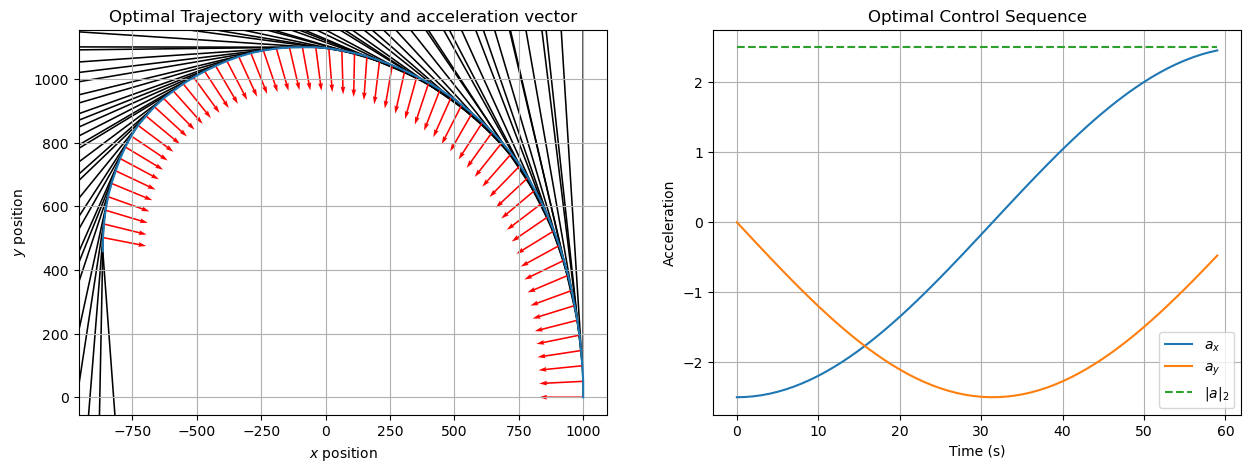

In [74]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(states[:,0], states[:,1])
plt.quiver(states[:,0], states[:,1], states[:,2], states[:,3], scale=30, width=.003)  # show velocity vector
plt.quiver(states[:-1,0], states[:-1,1], controls[:,0], controls[:,1], scale=30, width=.003, color='red')  # show acceleration vector
plt.title("Optimal Trajectory with velocity and acceleration vector")
plt.xlabel("$x$ position")
plt.ylabel("$y$ position")
plt.grid()

plt.subplot(1,2,2)
plt.plot(controls)
plt.plot(np.linalg.norm(controls, 2, axis=1), '--')
plt.title("Optimal Control Sequence")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration")
plt.legend(["$a_x$", "$a_y$", "$\|a\|_2$"])
plt.grid()

In [55]:
Q = np.diag([1,1])
R = 9*np.diag([1,1])
mean = np.array([0,0])

x, y = np.random.multivariate_normal(mean, Q,)

print(x)
y

0.627189285992167


-0.620287863642862